# Predict Credit Card Consumption of Customer For a Leading Bank

#### Import Libraries/Necessary Packages

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import zscore
import numpy as np

### Data Preprocessing

#### Import Data

In [2]:
path = './Dataset'

customer_demographics = pd.read_csv(f'{path}/CustomerDemographics.csv')
customer_behavior = pd.read_csv(f'{path}/CustomerBehaviorData.csv')
credit_consumption = pd.read_csv(f'{path}/CreditConsumptionData.csv')

#### Check For Data Consistency

In [3]:
print(set(customer_demographics['ID']) == set(customer_behavior['ID']) == set(credit_consumption['ID']))

True


### Merge Data

In [4]:
data = pd.merge(customer_demographics, customer_behavior, on='ID')

data = pd.merge(data, credit_consumption, on='ID')

data.columns

Index(['ID', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr',
       'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'loan_enq', 'emi_active', 'cc_cons'],
      dtype='object')

### Clean Data

#### Remove Null Rows Except `cc_cons`

- Check For Null

In [5]:
data.isnull().sum()

ID                                 0
account_type                       1
gender                             1
age                                0
Income                             1
Emp_Tenure_Years                   0
Tenure_with_Bank                   0
region_code                        1
NetBanking_Flag                    0
Avg_days_between_transaction       3
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       1
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               1
vehicle_loan_closed                0
i

- Dropping NULL Values from a DataFrame

In [6]:
data = data.dropna(subset=data.columns.difference(['cc_cons']))

data.isnull().sum()

ID                                 0
account_type                       0
gender                             0
age                                0
Income                             0
Emp_Tenure_Years                   0
Tenure_with_Bank                   0
region_code                        0
NetBanking_Flag                    0
Avg_days_between_transaction       0
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        0
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        0
cc_count_apr                       0
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               0
vehicle_loan_closed                0
i

# Univiate Analysis

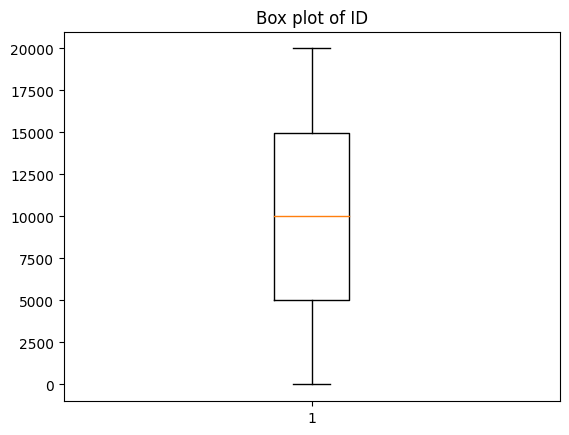

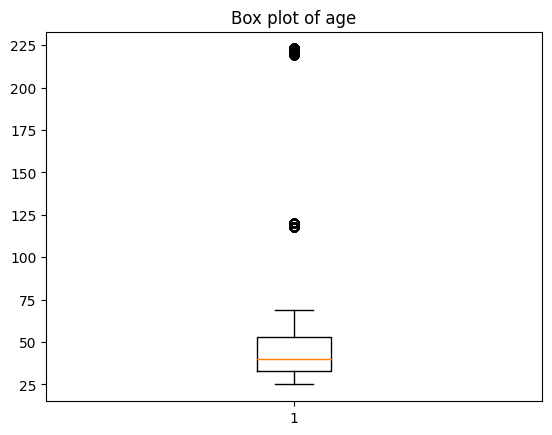

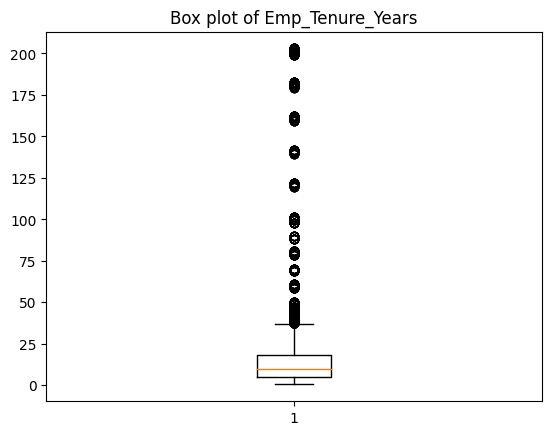

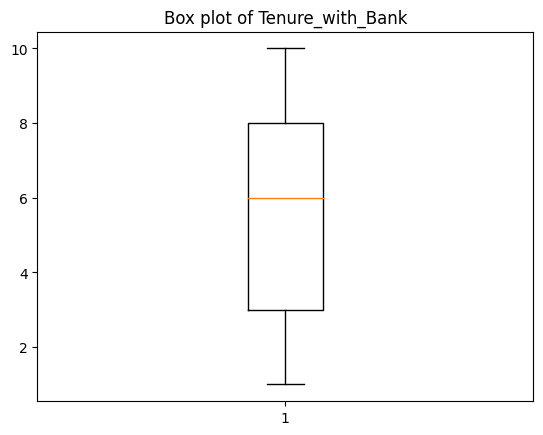

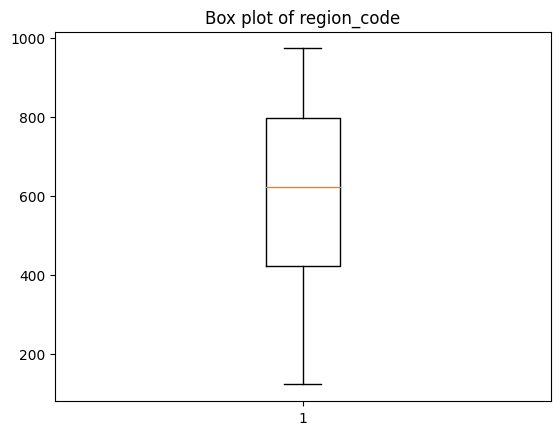

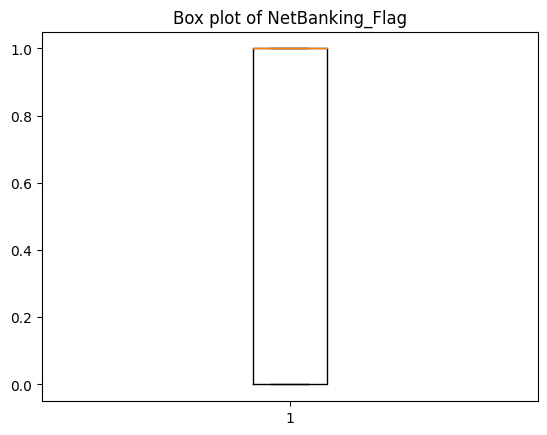

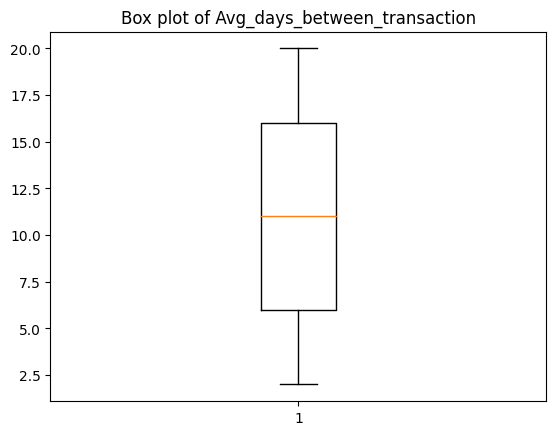

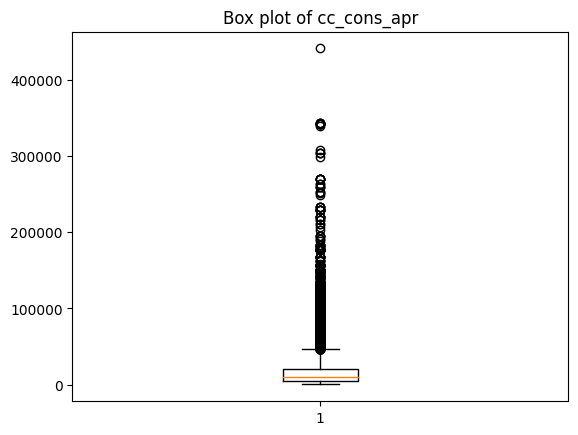

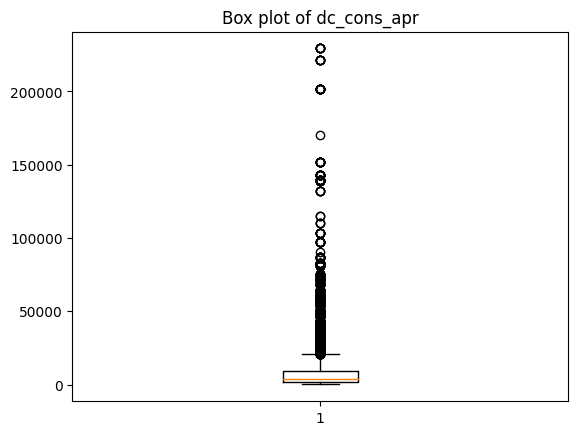

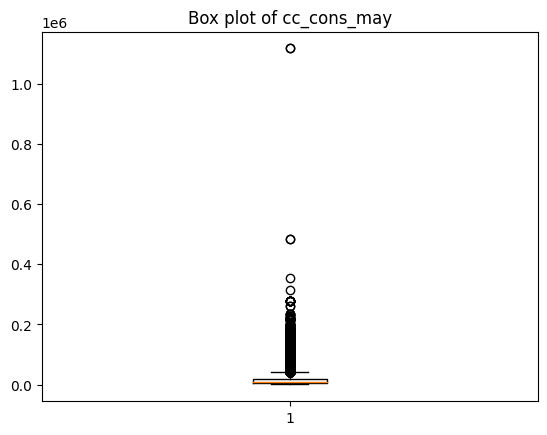

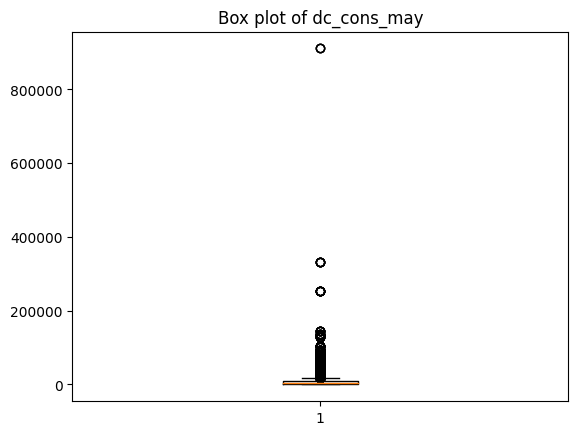

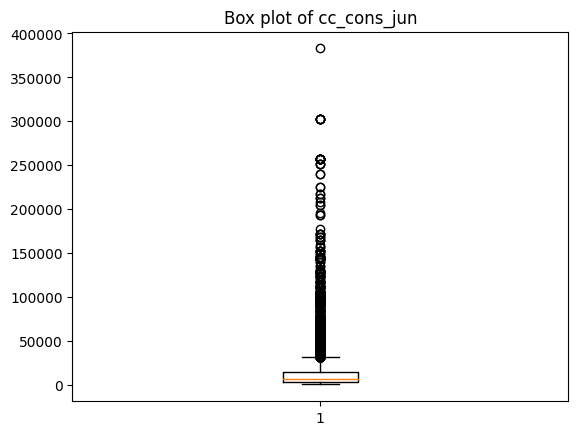

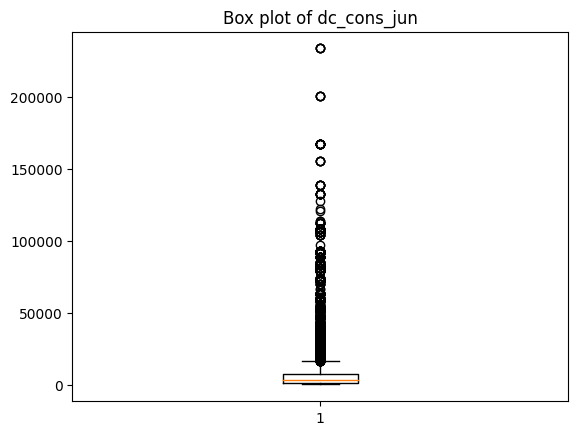

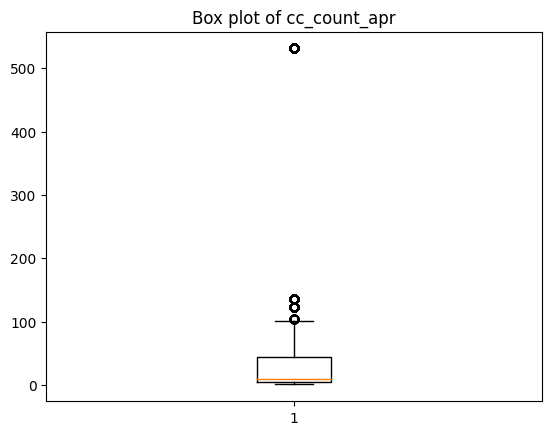

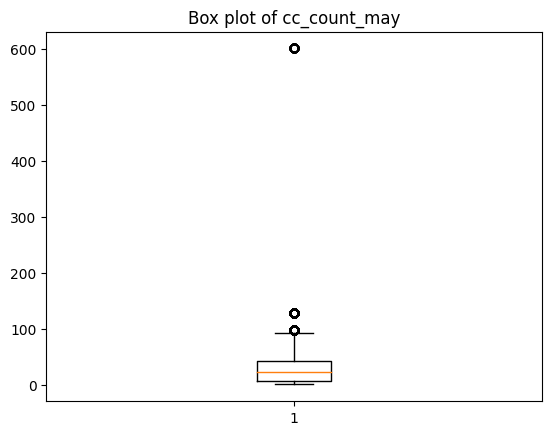

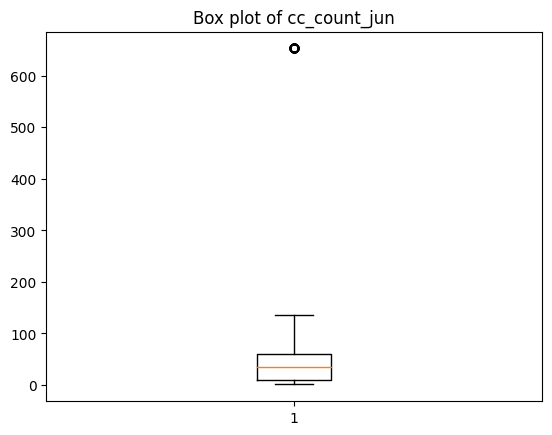

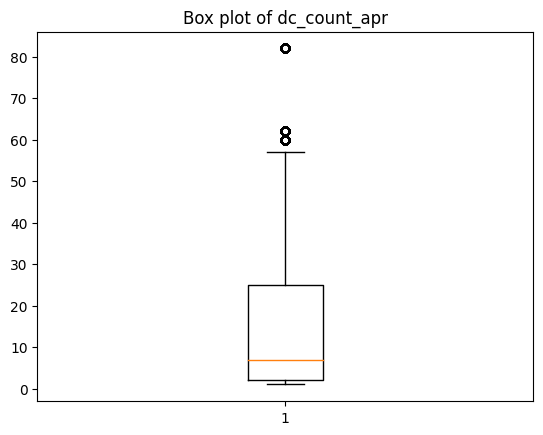

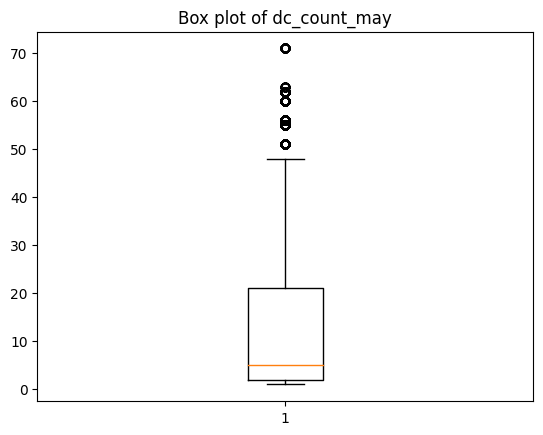

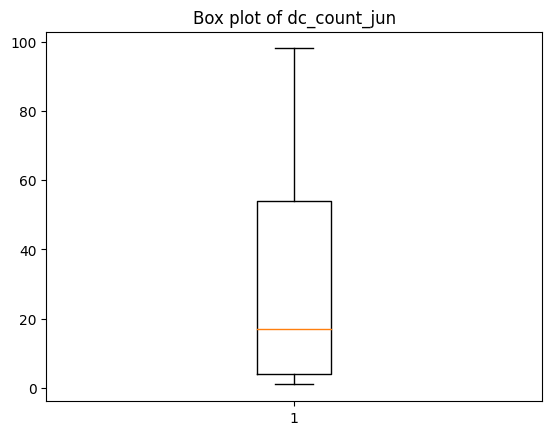

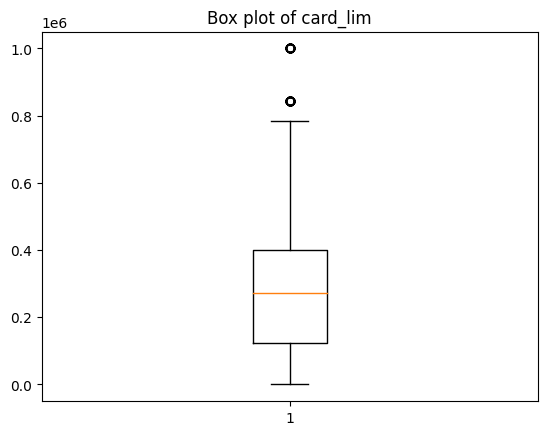

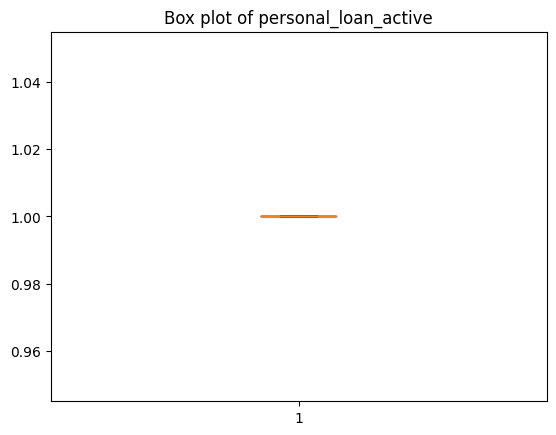

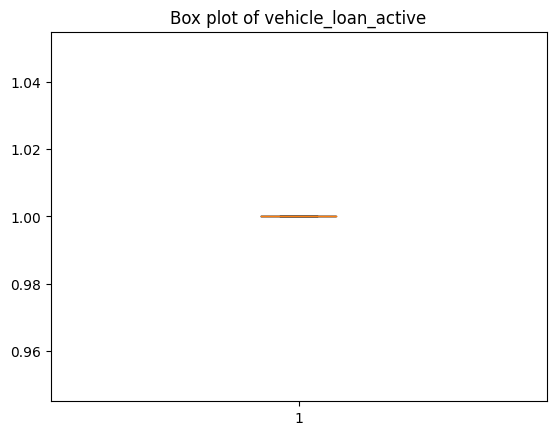

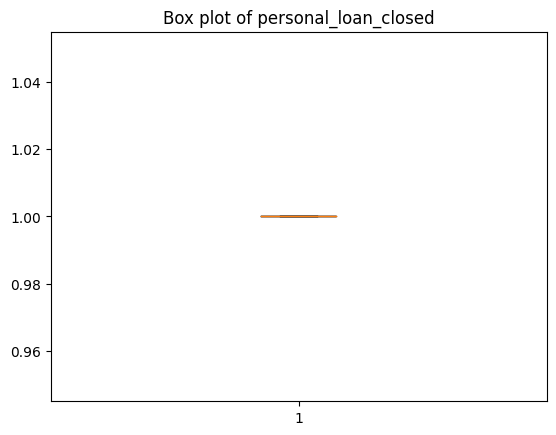

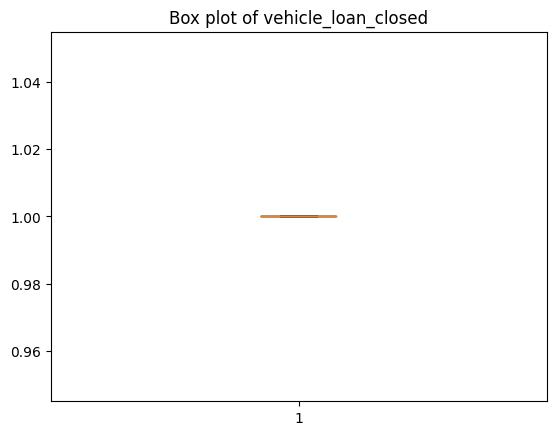

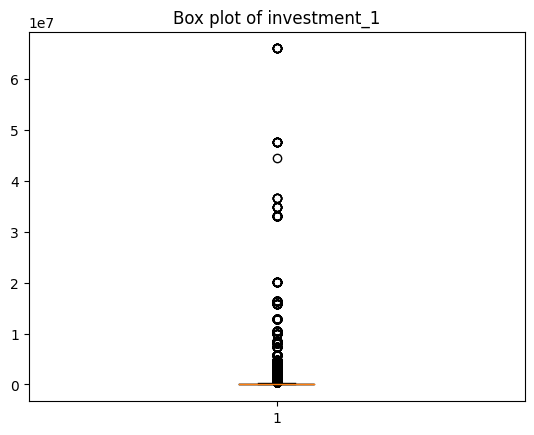

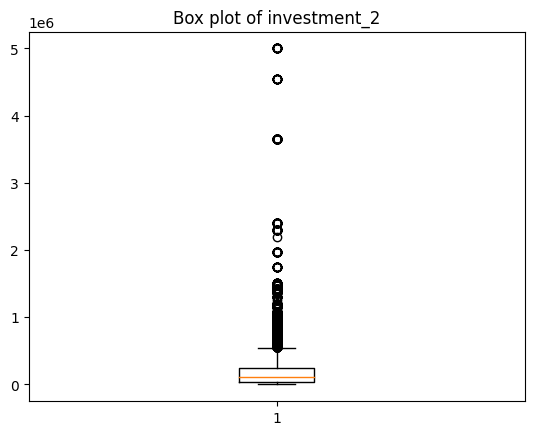

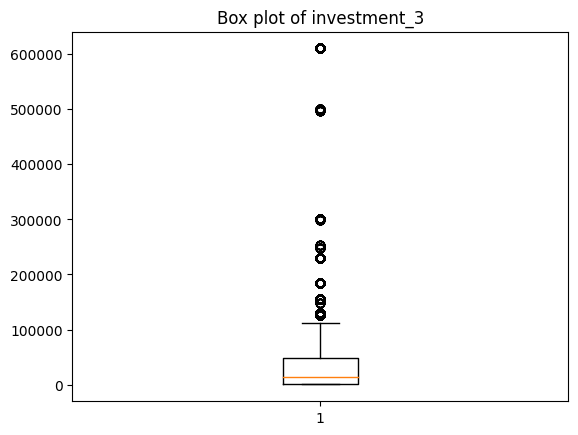

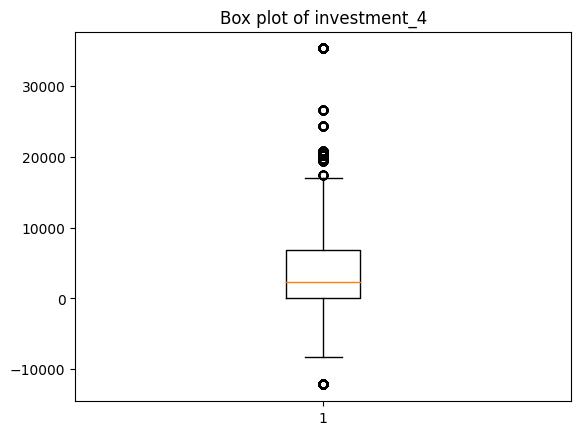

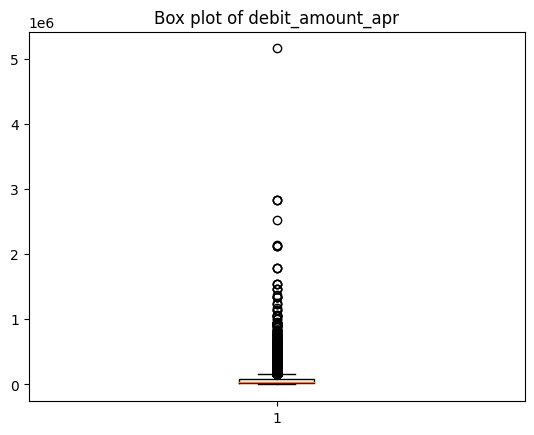

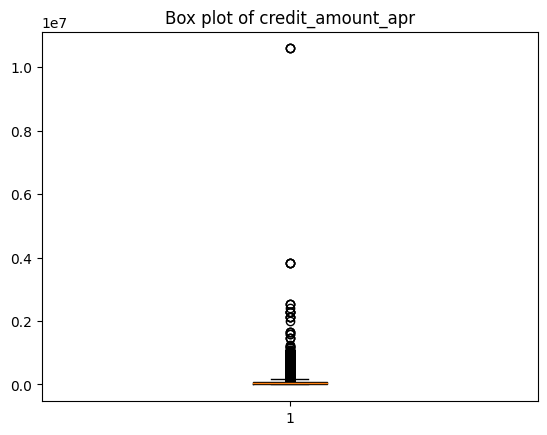

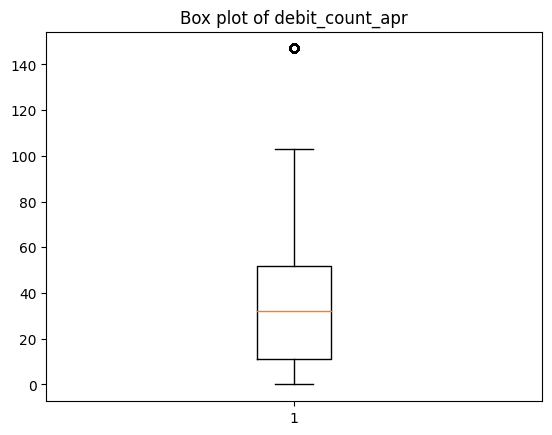

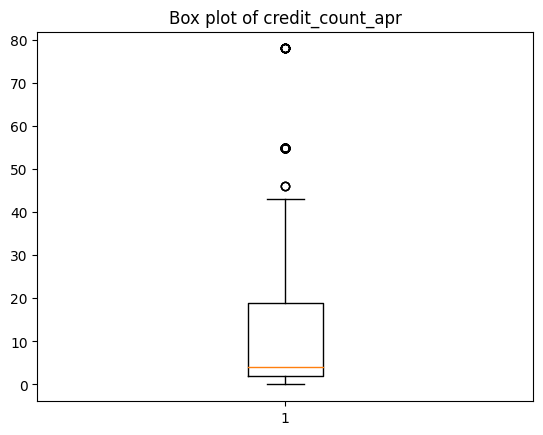

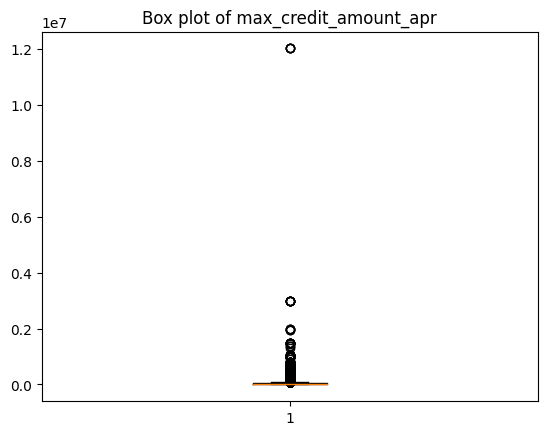

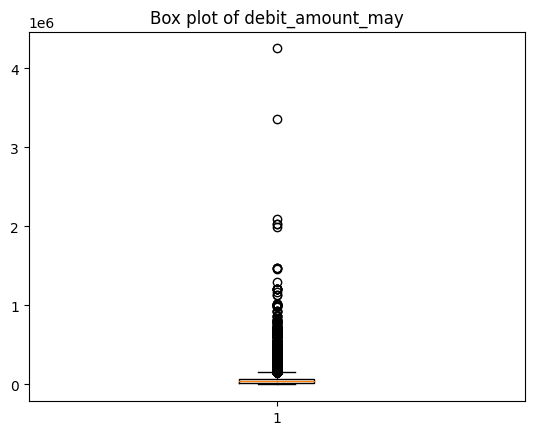

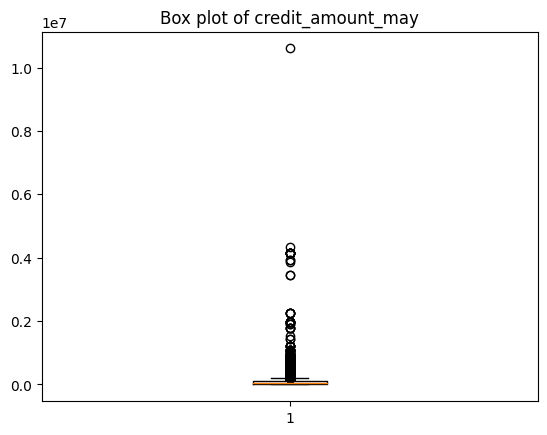

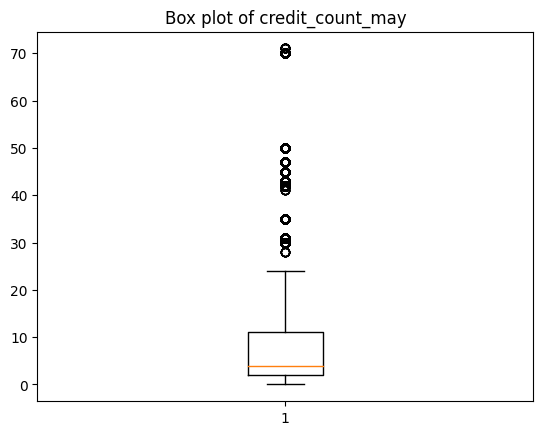

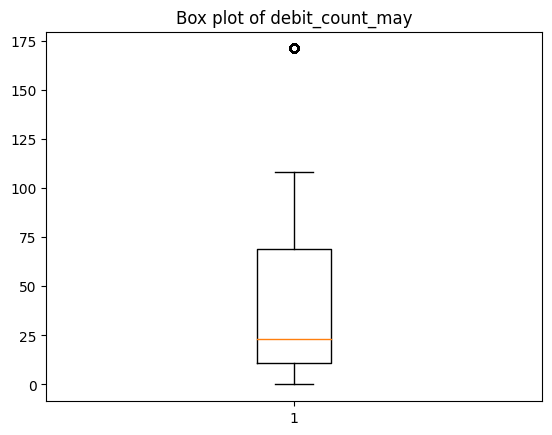

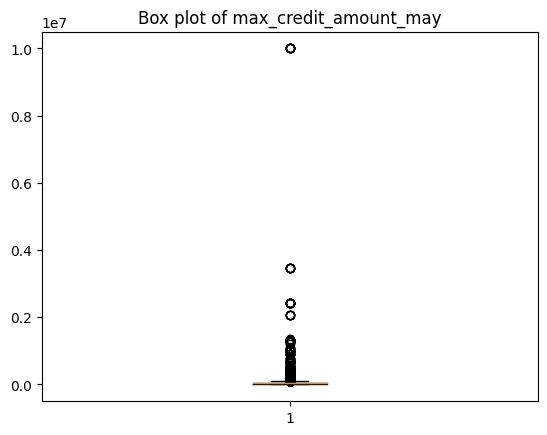

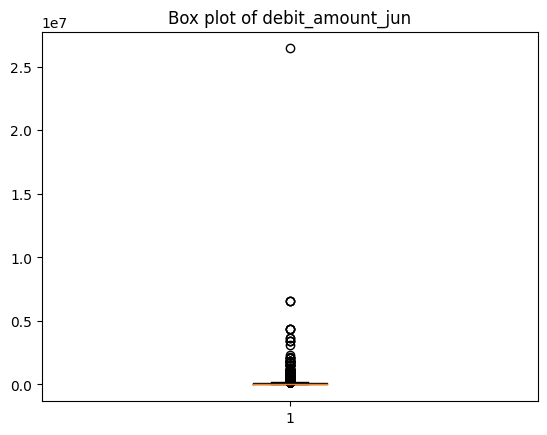

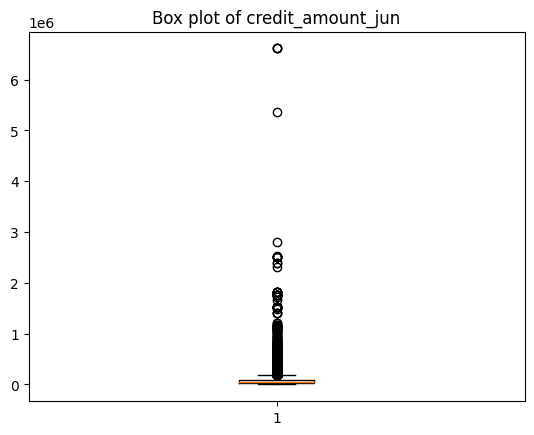

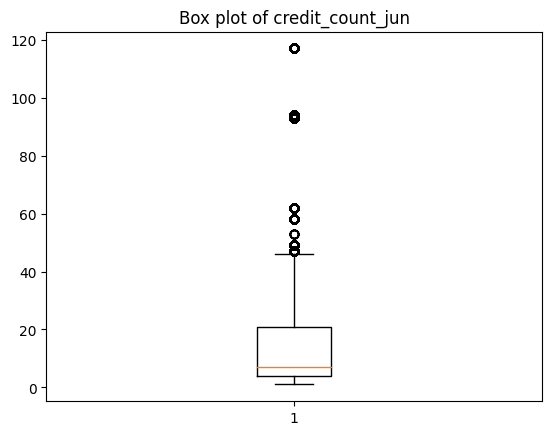

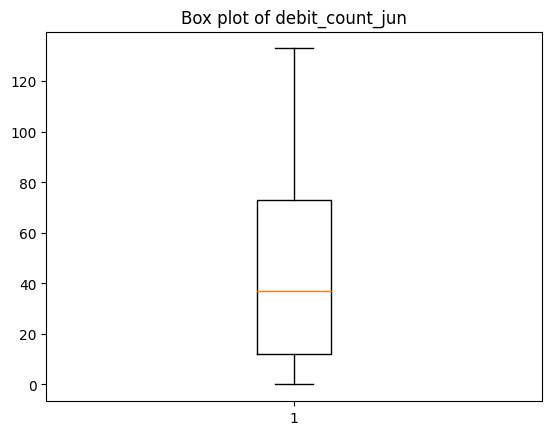

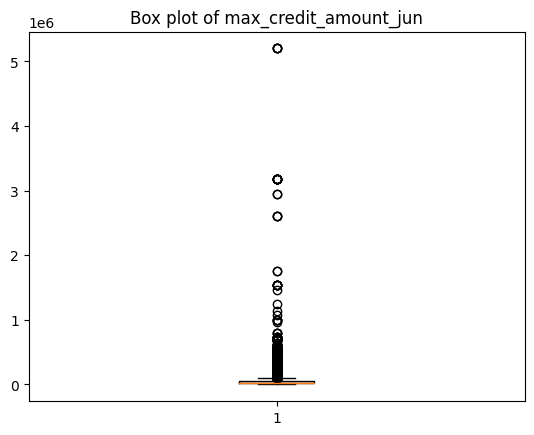

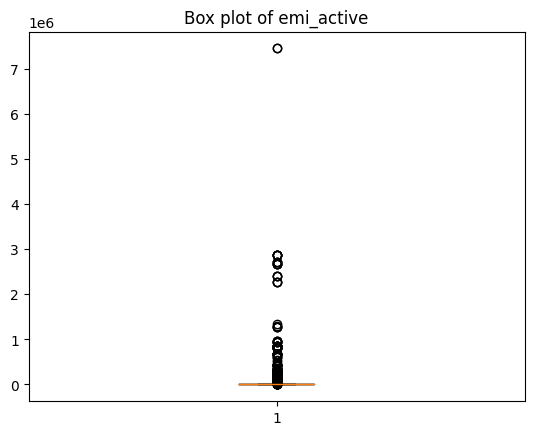

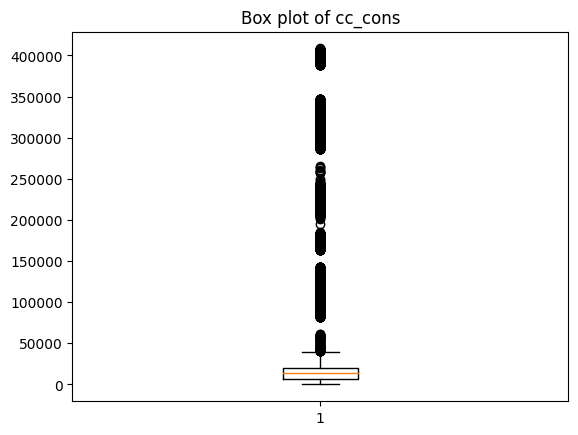

In [7]:
import matplotlib.pyplot as plt
# Select only the numeric columns in the DataFrame
numeric_columns = data.select_dtypes(include='number').columns

# Loop over the columns and create a box plot for each one
for col in numeric_columns:
    plt.boxplot(data[col].dropna())
    plt.title(f'Box plot of {col}')
    plt.show()

# Biviate Analysis

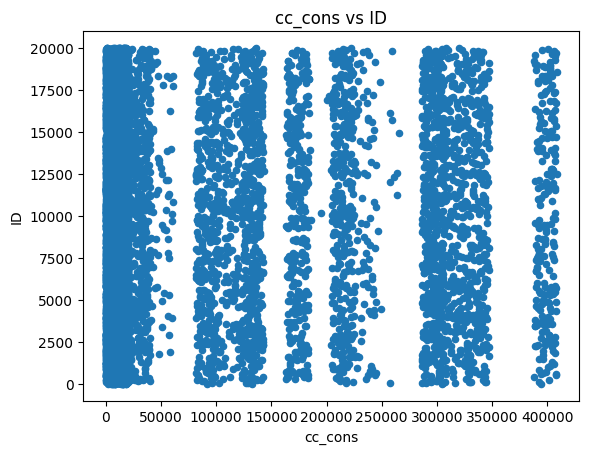

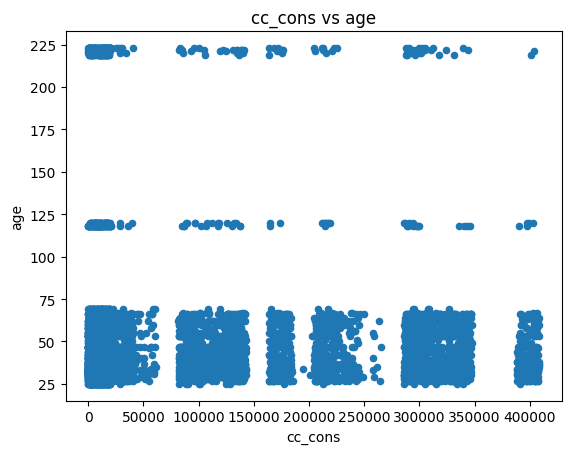

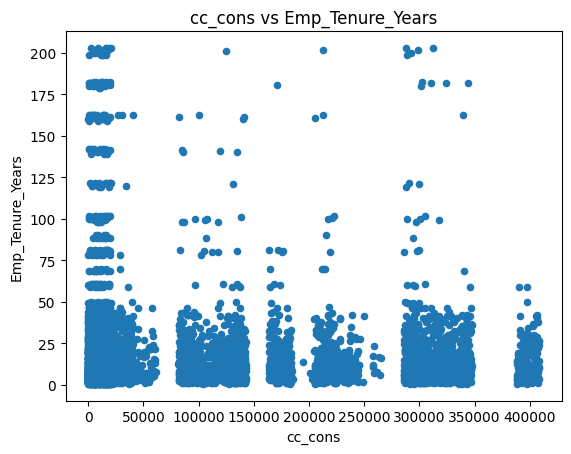

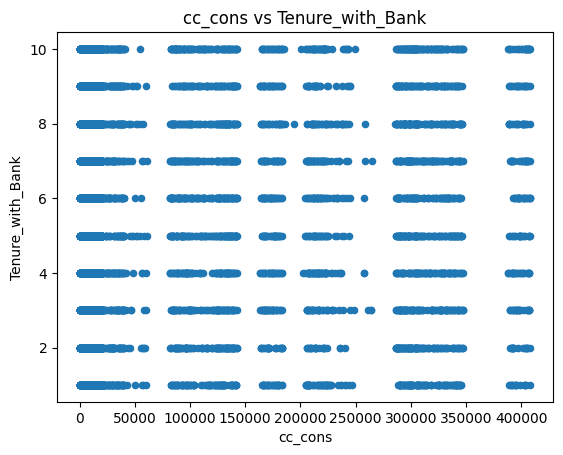

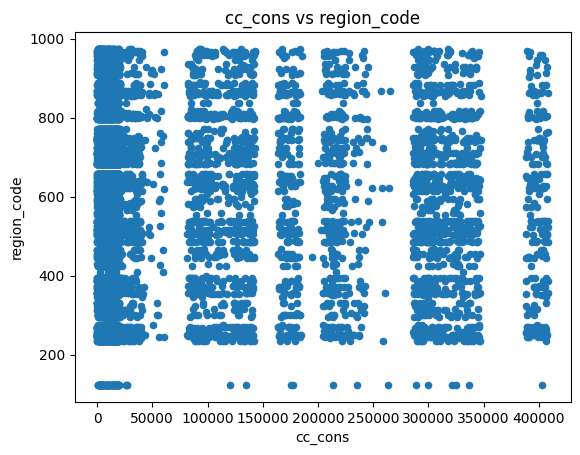

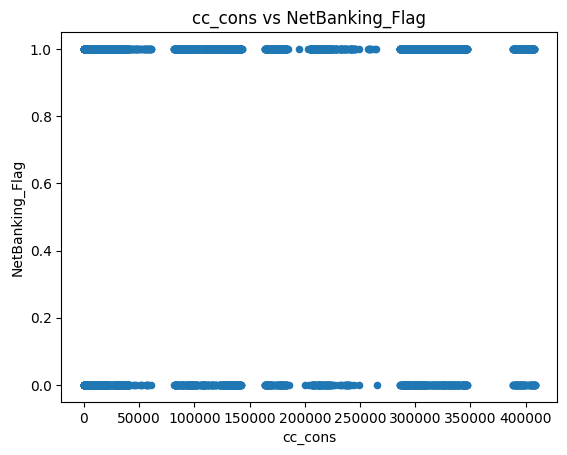

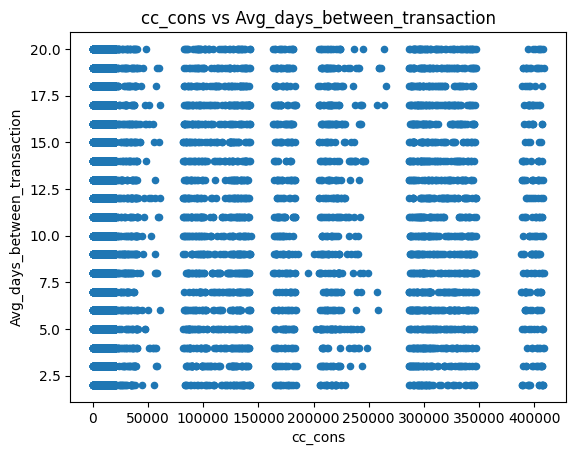

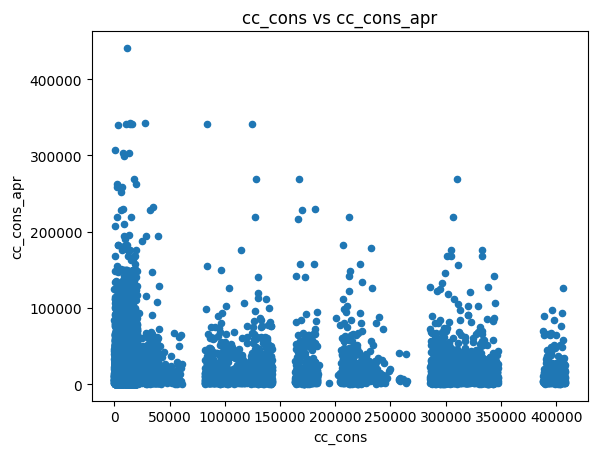

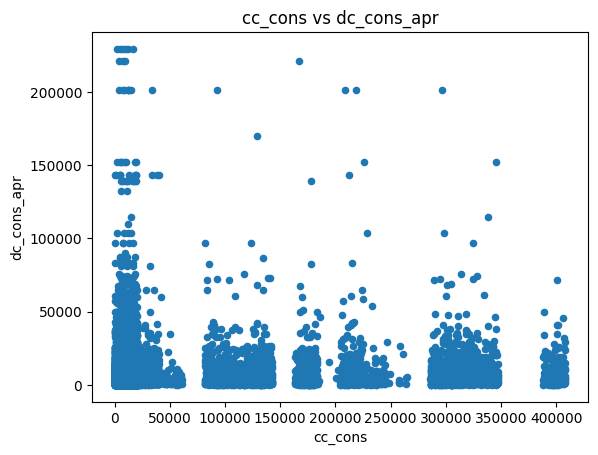

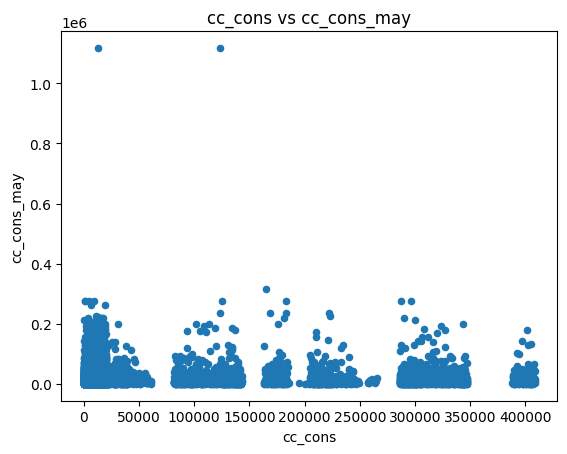

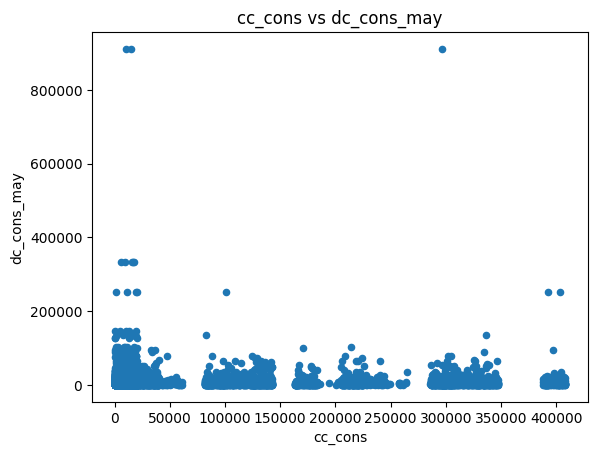

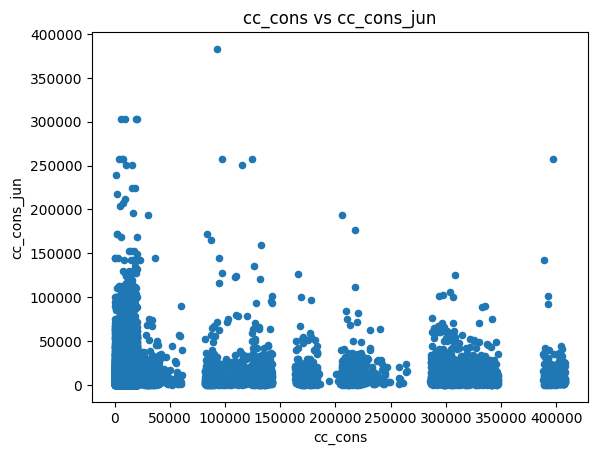

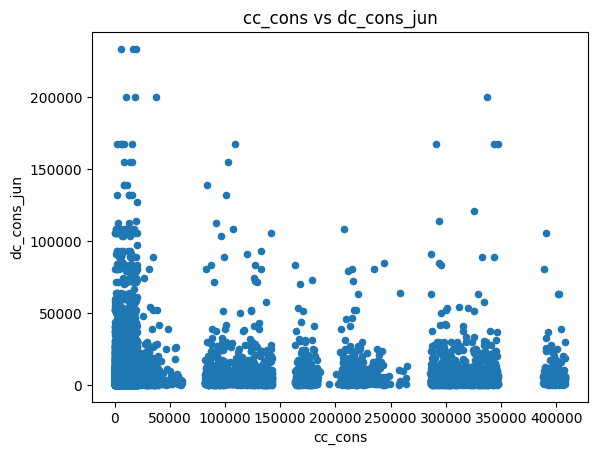

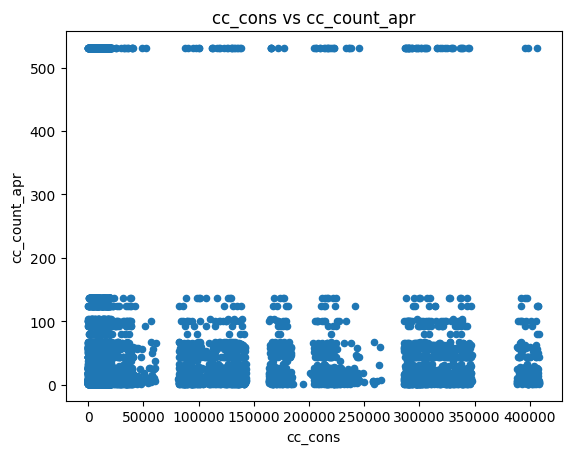

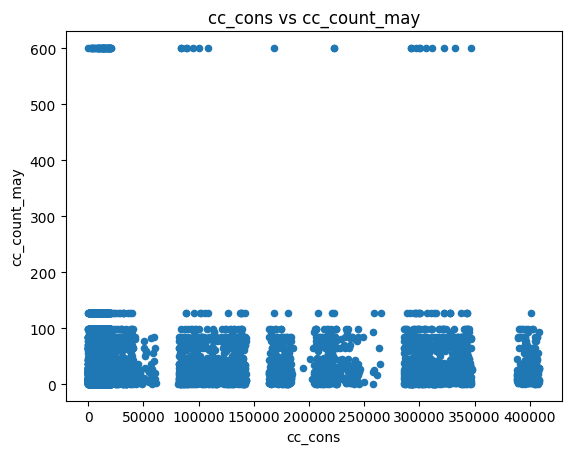

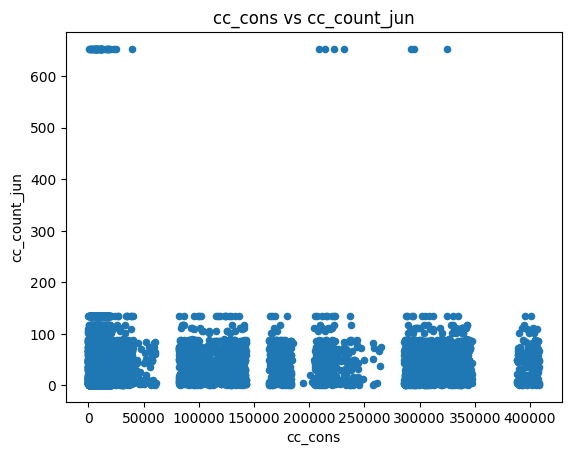

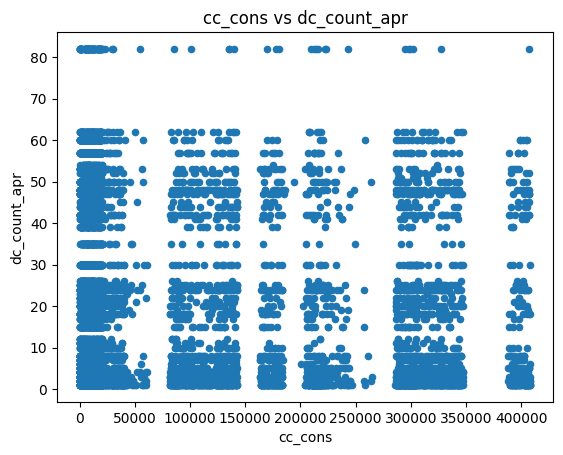

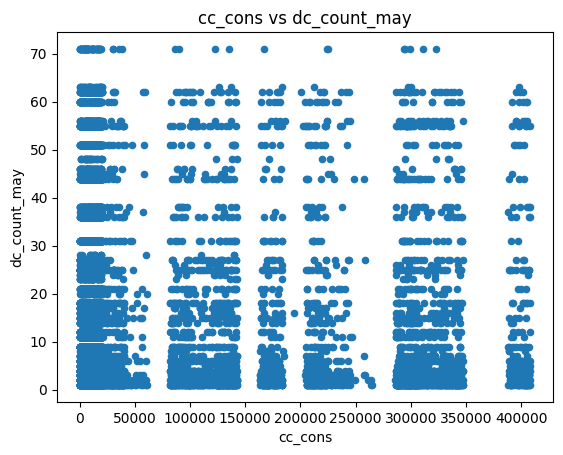

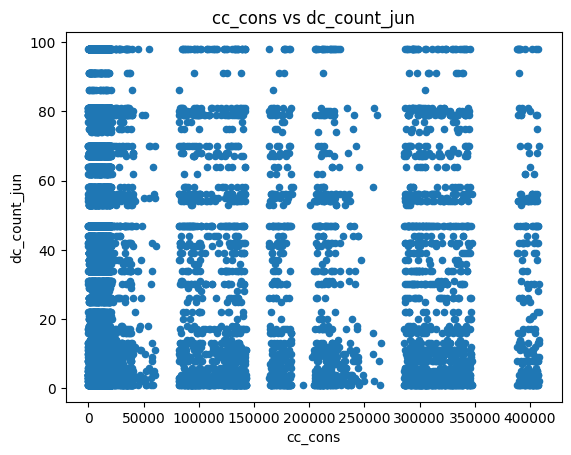

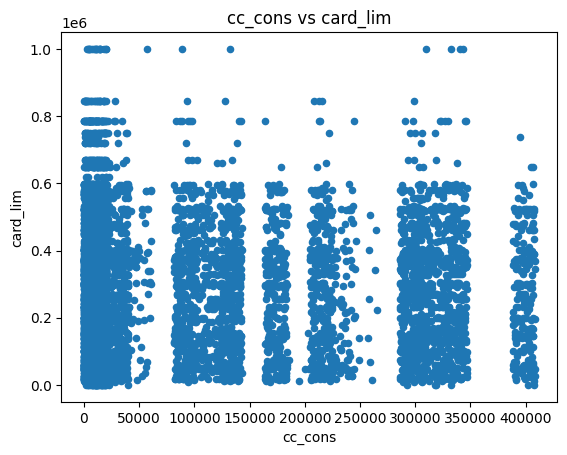

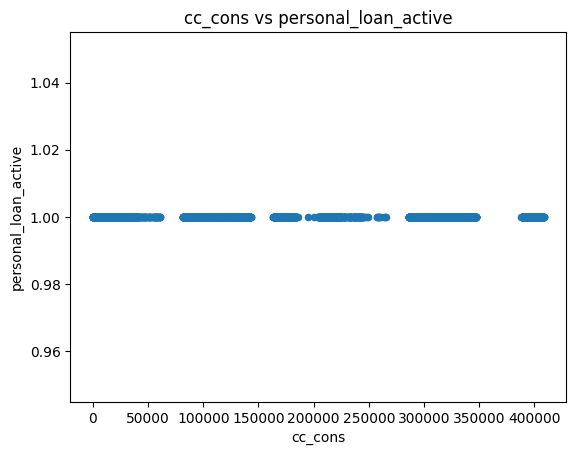

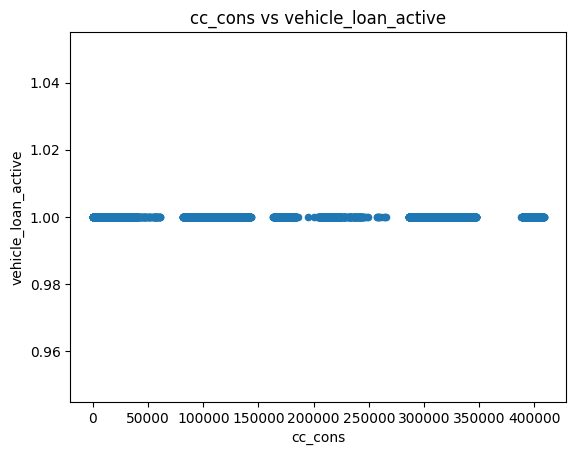

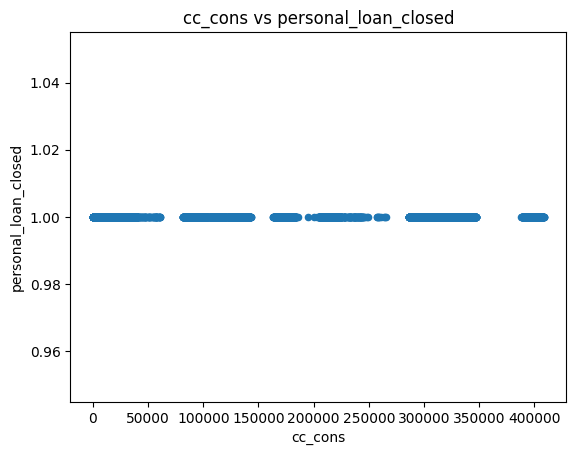

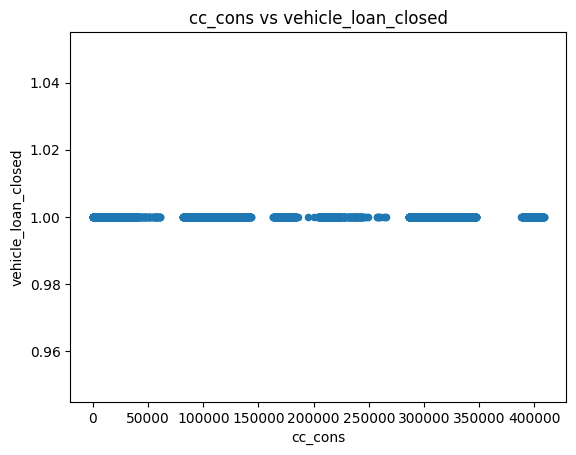

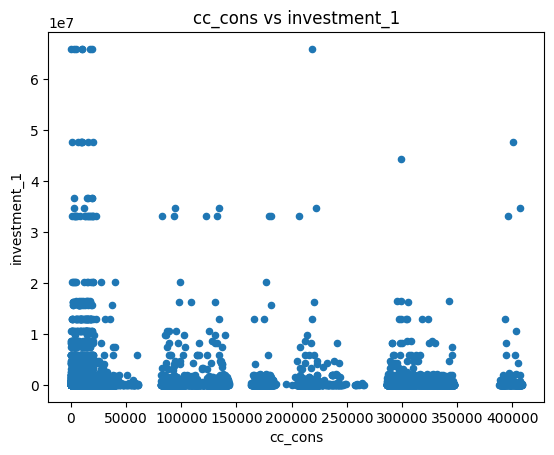

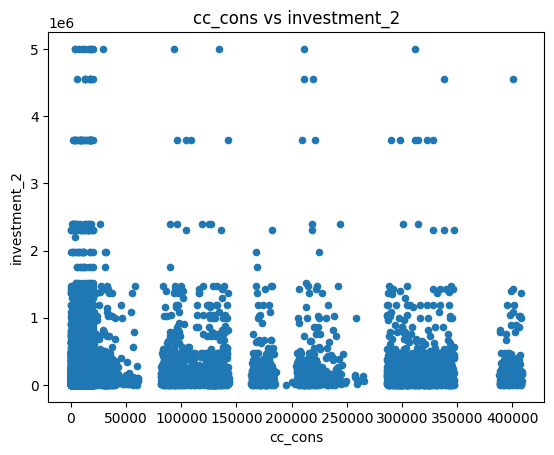

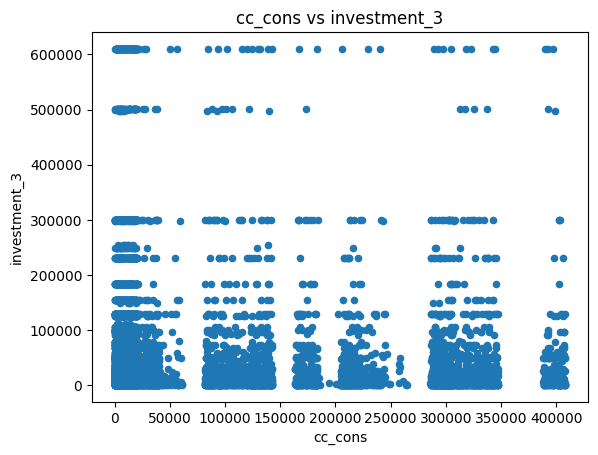

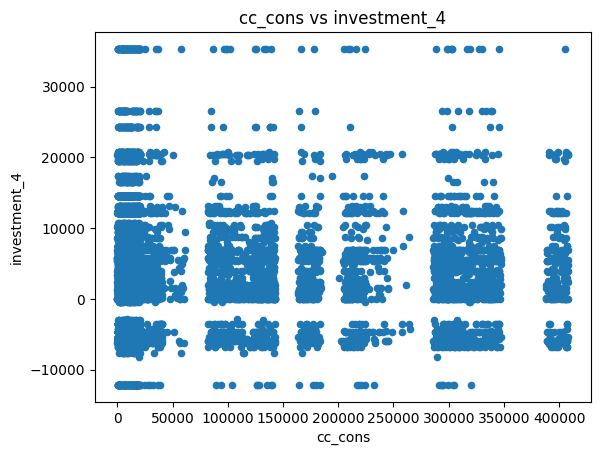

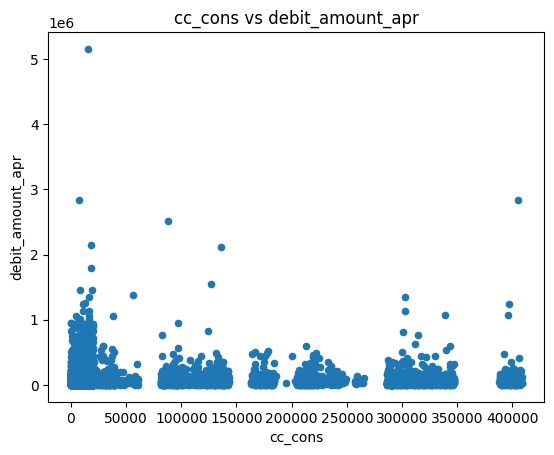

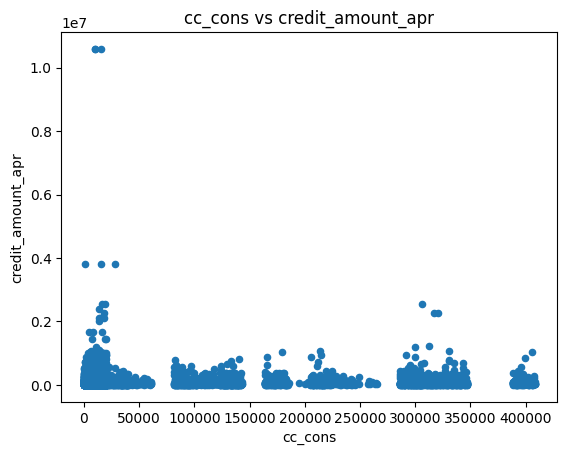

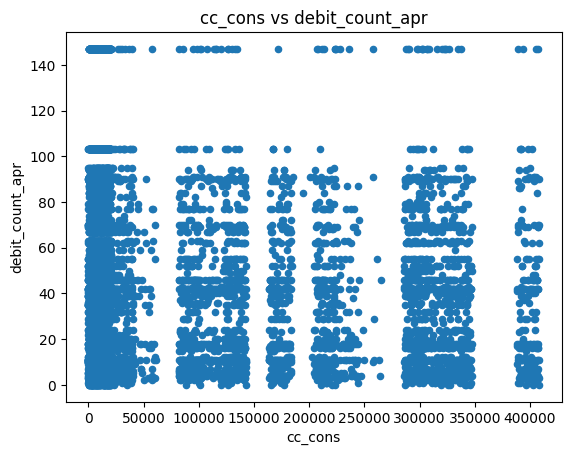

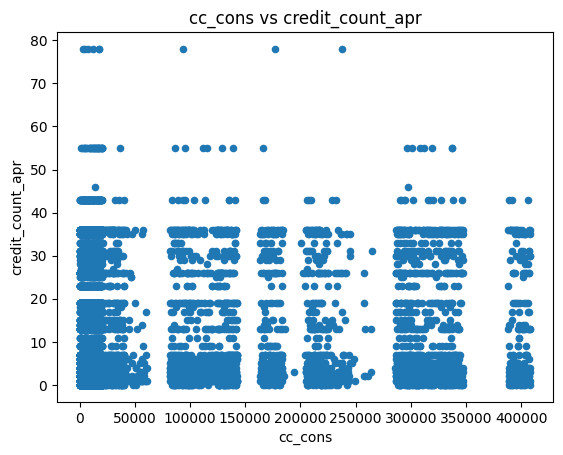

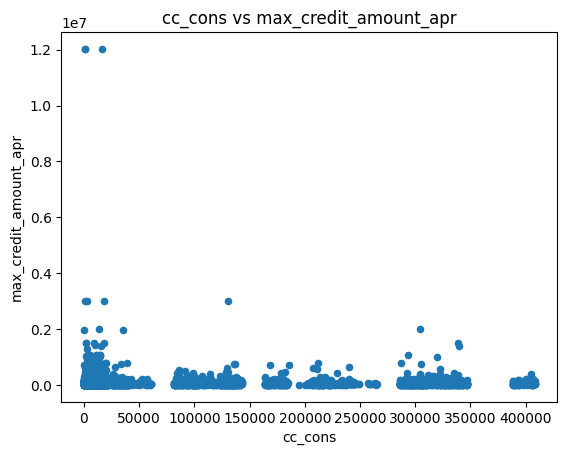

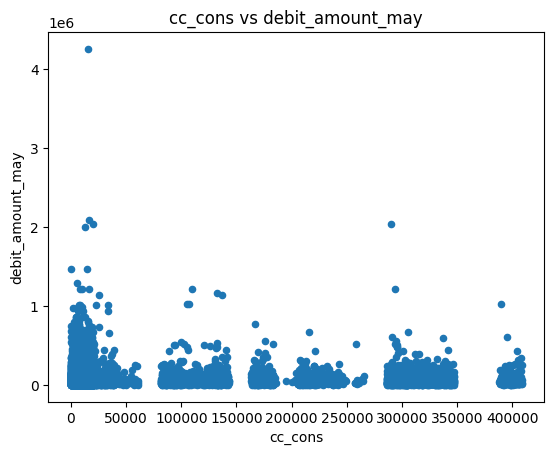

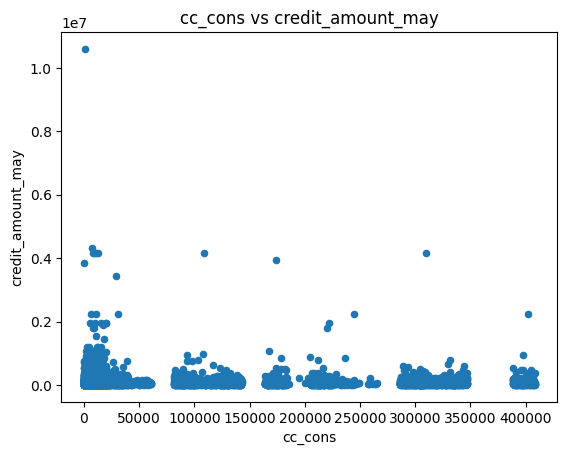

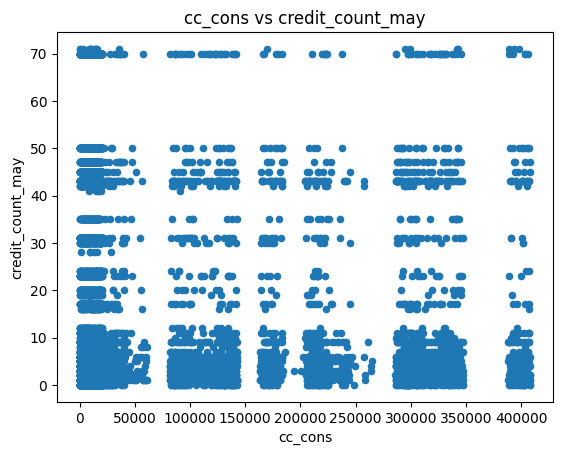

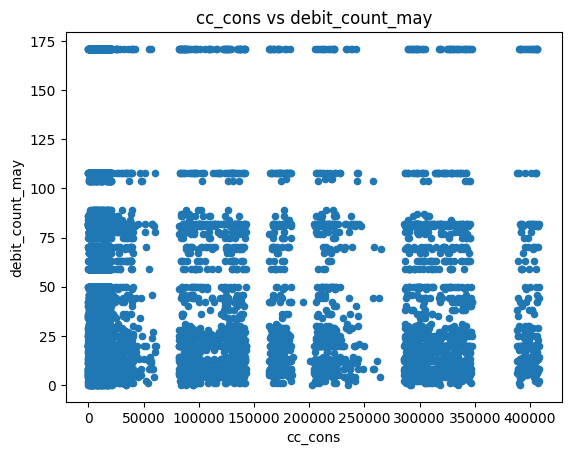

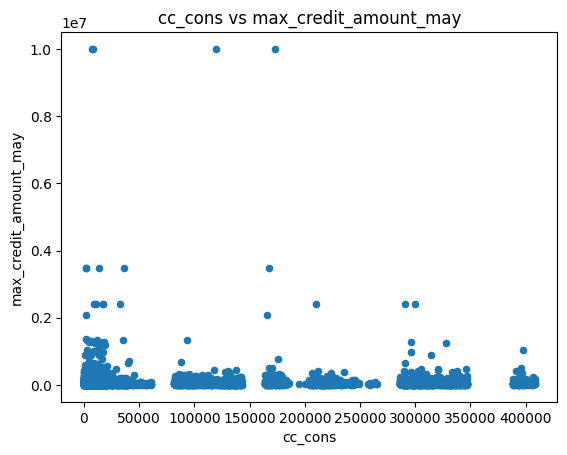

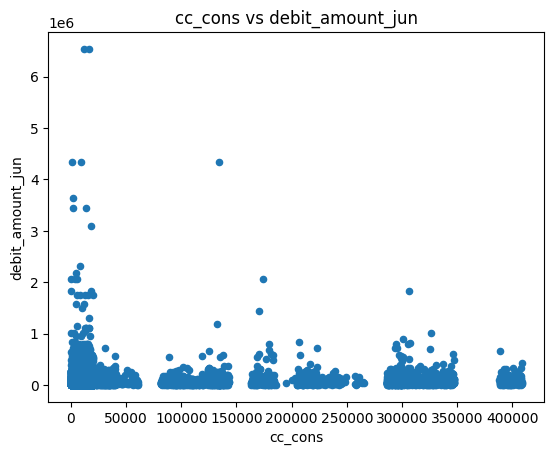

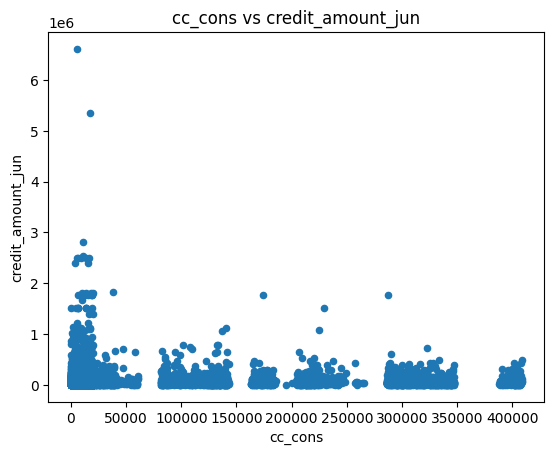

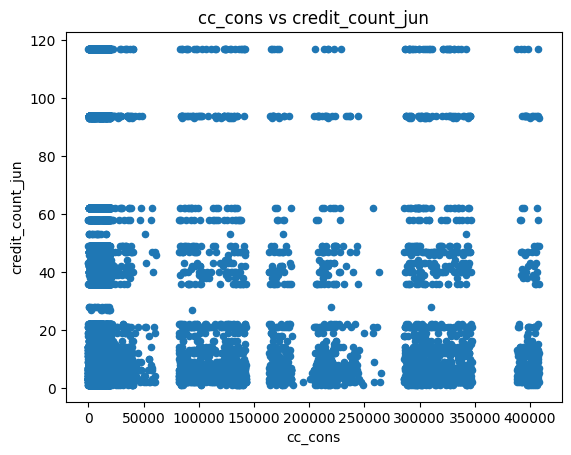

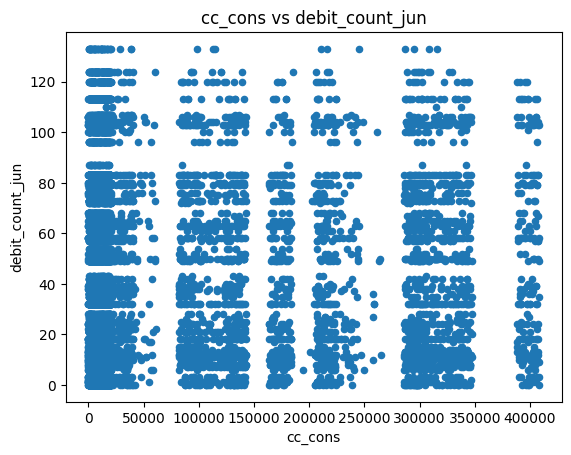

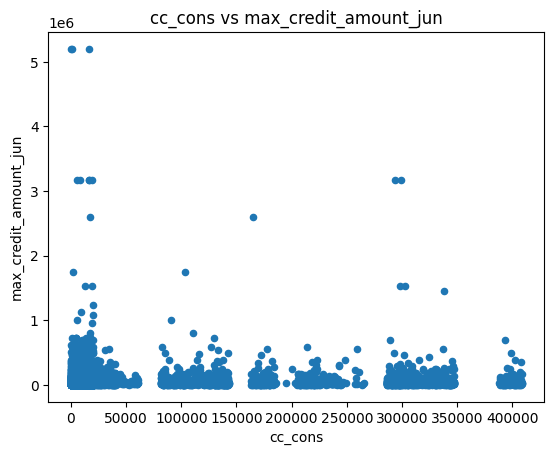

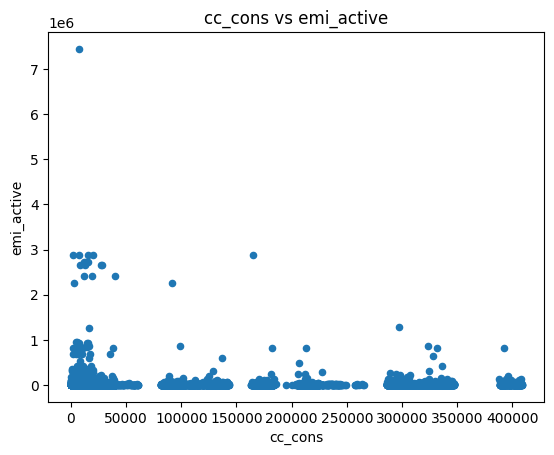

In [8]:
#Study the relationship between all the columns with the target 'cc_cons'

numeric_columns = data.select_dtypes(include='number').columns

for col in numeric_columns:
    if col != 'cc_cons':
        data.plot(x='cc_cons', y=col, kind='scatter')
        plt.title(f'cc_cons vs {col}')
        plt.show()


#### Removing Outliers

#####  IQR Remove Outliers

In [9]:
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[col] >= Q1 - 1.5*IQR) & (data[col] <= Q3 + 1.5*IQR)]
    return data

##### Age Outliers

- Check For Outliers Via Boxplot

In [10]:
fig = px.box(data, y='age', title='Distribution of Ages')
fig.update_layout(yaxis_title='Age',  xaxis_title='Frequency')

fig.show()

- Removing Outlier From Age

In [11]:
data = remove_outliers_iqr(data, 'age')

fig = px.box(data, y='age')

fig.show()

##### Emp_Tenure_Years Outliers

- Boxplot Check

In [12]:
fig = px.box(data, y='Emp_Tenure_Years')

fig.show()

data['Emp_Tenure_Years'].describe()

data.shape

(19282, 49)

- Remove Outliers using Z-Score

In [13]:
# Calculate the z-scores for the Emp_Tenure_Years column
z_scores = np.abs(zscore(data['Emp_Tenure_Years']))

# Remove rows with at least one z-score greater than 3
data = data[z_scores < 3]

fig = px.box(data, y='Emp_Tenure_Years')
fig.show()

data['Emp_Tenure_Years'].describe()

count    19075.000000
mean        12.112356
std          9.514216
min          0.500000
25%          4.900000
50%          9.200000
75%         16.400000
max         42.300000
Name: Emp_Tenure_Years, dtype: float64

#### Replace Outliers

In [14]:
# Replace outliers with 25th and 75th percentiles for both dataframes
num_cols = data.select_dtypes(include=np.number).columns
cat_cols = data.select_dtypes(exclude=np.number).columns

num_data = data[num_cols]
cat_data = data[cat_cols]

num_data = num_data.apply(lambda x: x.clip(lower=x.quantile(0.25), upper=x.quantile(0.75), axis=0))

data = pd.concat([num_data, cat_data], axis=1)

### Data Exploration & Visualization

#### Summary Statistics

In [15]:
data.describe()

ID           age  Emp_Tenure_Years  Tenure_with_Bank  \
count  19075.000000  19075.000000      19075.000000      19075.000000   
mean   10002.711140     41.471140         10.207843          5.499397   
std     4088.243869      8.363319          4.661596          2.059520   
min     4997.500000     33.000000          4.900000          3.000000   
25%     4997.750000     33.000000          4.900000          3.000000   
50%     9994.000000     38.000000          9.200000          6.000000   
75%    15007.250000     53.000000         16.400000          8.000000   
max    15007.500000     53.000000         16.400000          8.000000   

        region_code  NetBanking_Flag  Avg_days_between_transaction  \
count  19075.000000      19075.00000                  19075.000000   
mean     610.029567          0.71654                     11.025793   
std      151.040449          0.45069                      4.050427   
min      424.000000          0.00000                      6.000000   
25%      424.000000          0.00000                      6.000000   
50%      623.000000          1.00000                     11.000000   
75%      799.000000          1.00000                     16.000000   
max      799.000000          1.00000                     16.000000   

        cc_cons_apr   dc_cons_apr   cc_cons_may  ...  credit_count_may  \
count  19075.000000  19075.000000  19075.000000  ...      19075.000000   
mean   11865.248885   4939.217366  10259.088285  ...          5.629148   
std     6845.469455   3129.897289   6142.657976  ...          3.679294   
min     4391.655000   1629.355000   3636.460000  ...          2.000000   
25%     4392.212500   1629.657500   3636.460000  ...          2.000000   
50%    10223.340000   3964.750000   8635.230000  ...          4.000000   
75%    21165.000000   9296.772500  18634.467500  ...         11.000000   
max    21165.000000   9310.855000  18635.645000  ...         11.000000   

       debit_count_may  max_credit_amount_may  debit_amount_jun  \
count     19075.000000           19075.000000      19075.000000   
mean         34.433185           35931.778946      52290.498842   
std          24.005952           14741.974487      24366.003877   
min          11.000000           20216.200000      25773.820000   
25%          11.000000           20216.200000      25775.100000   
50%          23.000000           31492.000000      45837.470000   
75%          69.000000           56395.500000      85787.510000   
max          69.000000           56404.000000      85787.510000   

       credit_amount_jun  credit_count_jun  debit_count_jun  \
count       19075.000000      19075.000000     19075.000000   
mean        52375.636001         10.796592        40.317851   
std         24897.464384          7.125829        25.278036   
min         24987.000000          4.000000        12.000000   
25%         24994.000000          4.000000        12.000000   
50%         46249.000000          7.000000        37.000000   
75%         86391.070000         21.000000        73.000000   
max         86391.070000         21.000000        73.000000   

       max_credit_amount_jun    emi_active       cc_cons  
count           19075.000000  19075.000000  14303.000000  
mean            34174.595198   4916.057951  13422.026917  
std             13946.714406   3193.081773   5440.381399  
min             18999.500000   1544.690000   6769.500000  
25%             18999.750000   1544.690000   6769.750000  
50%             30298.000000   3931.150000  13385.000000  
75%             53449.000000   9362.140000  20111.250000  
max             53449.000000   9362.140000  20111.500000  

[8 rows x 45 columns]

#### Average Credit Card Spend For April, May and June

In [16]:
# Define the months and the average credit card spending
months = ['April', 'May', 'June']
spend = data[['cc_cons_apr', 'cc_cons_may', 'cc_cons_jun']].mean()

# Plot the bar graph for average monthly credit card spending
fig = px.bar(x=months, y=spend, color=months, title='Average Monthly Credit Card Spending')

# Set x-axis title
fig.update_layout(xaxis_title='Month', yaxis_title='Average Spend', legend_title='Month')

# Show plot
fig.show()

#### Distribution of Customer Income Levels

In [17]:
income_counts = data['Income'].value_counts()

print(data['Income'].value_counts())

fig = go.Figure()

fig.add_traces(go.Pie(labels=income_counts.index, values=income_counts.values))

fig.update_layout(title='Distribution of Income Level')

fig.show()

Income
MEDIUM    12187
LOW        5351
HIGH       1537
Name: count, dtype: int64


#### Status of personal loans active for different groups of customers

In [18]:
loan_counts = data.groupby(['Income', 'personal_loan_active'])['ID'].count().reset_index()

loan_counts = loan_counts.rename(columns={'ID': 'Count'})

fig = px.bar(loan_counts, x='Count', y='Income')

fig.update_layout(
    title='Income vs. Personal Loan Active',
    xaxis_title='Income',
    yaxis_title='Personal Loan Active',
)

fig.show()

#### Average Credit Card Spending by Region

In [19]:
visual_data = pd.DataFrame()

visual_data['region_code'] = data['region_code']
visual_data['avg_cc_cons'] = data[["cc_cons_apr", "cc_cons_may", "cc_cons_jun"]].mean(axis=1)

visual_data

# Visualize the data
fig = px.scatter(visual_data, x="region_code", y="avg_cc_cons", color="avg_cc_cons")

fig.show()


In [20]:
data.nunique()

ID                              9539
age                               16
Emp_Tenure_Years                  76
Tenure_with_Bank                   6
region_code                      104
NetBanking_Flag                    2
Avg_days_between_transaction      11
cc_cons_apr                     4145
dc_cons_apr                     1955
cc_cons_may                     4165
dc_cons_may                     1988
cc_cons_jun                     3593
dc_cons_jun                     1538
cc_count_apr                      26
cc_count_may                      29
cc_count_jun                      31
dc_count_apr                      20
dc_count_may                      17
dc_count_jun                      33
card_lim                         148
personal_loan_active               1
vehicle_loan_active                1
personal_loan_closed               1
vehicle_loan_closed                1
investment_1                     330
investment_2                     260
investment_3                     129
i

Study the correlation between all variables and target  variables cc_cons

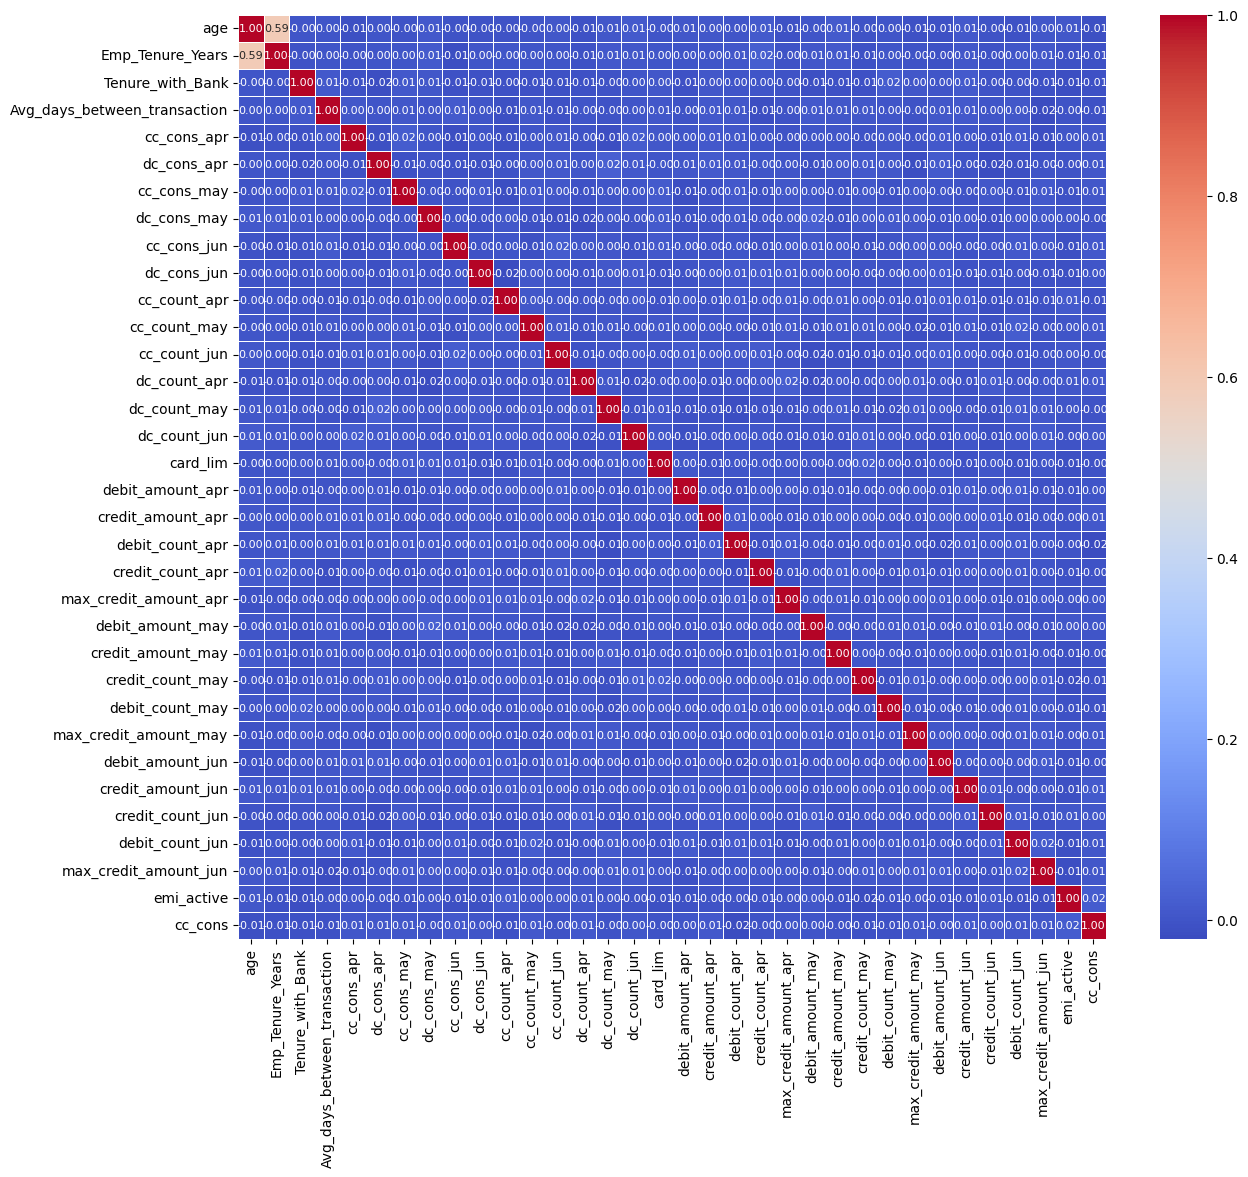

In [21]:
import seaborn as sns
numeric_columns = ['age', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'Avg_days_between_transaction',
                     'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
                     'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
                     'card_lim', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
                     'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'credit_count_may',
                     'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
                     'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'cc_cons']

corr = data[numeric_columns].corr()
# Set up the matplotlib figure and adjust size
plt.figure(figsize=(14, 12))

# Create a heatmap using seaborn, rotate labels, and adjust font size
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}, linewidths=0.5)
plt.show()

In [22]:
data.describe()

ID           age  Emp_Tenure_Years  Tenure_with_Bank  \
count  19075.000000  19075.000000      19075.000000      19075.000000   
mean   10002.711140     41.471140         10.207843          5.499397   
std     4088.243869      8.363319          4.661596          2.059520   
min     4997.500000     33.000000          4.900000          3.000000   
25%     4997.750000     33.000000          4.900000          3.000000   
50%     9994.000000     38.000000          9.200000          6.000000   
75%    15007.250000     53.000000         16.400000          8.000000   
max    15007.500000     53.000000         16.400000          8.000000   

        region_code  NetBanking_Flag  Avg_days_between_transaction  \
count  19075.000000      19075.00000                  19075.000000   
mean     610.029567          0.71654                     11.025793   
std      151.040449          0.45069                      4.050427   
min      424.000000          0.00000                      6.000000   
25%      424.000000          0.00000                      6.000000   
50%      623.000000          1.00000                     11.000000   
75%      799.000000          1.00000                     16.000000   
max      799.000000          1.00000                     16.000000   

        cc_cons_apr   dc_cons_apr   cc_cons_may  ...  credit_count_may  \
count  19075.000000  19075.000000  19075.000000  ...      19075.000000   
mean   11865.248885   4939.217366  10259.088285  ...          5.629148   
std     6845.469455   3129.897289   6142.657976  ...          3.679294   
min     4391.655000   1629.355000   3636.460000  ...          2.000000   
25%     4392.212500   1629.657500   3636.460000  ...          2.000000   
50%    10223.340000   3964.750000   8635.230000  ...          4.000000   
75%    21165.000000   9296.772500  18634.467500  ...         11.000000   
max    21165.000000   9310.855000  18635.645000  ...         11.000000   

       debit_count_may  max_credit_amount_may  debit_amount_jun  \
count     19075.000000           19075.000000      19075.000000   
mean         34.433185           35931.778946      52290.498842   
std          24.005952           14741.974487      24366.003877   
min          11.000000           20216.200000      25773.820000   
25%          11.000000           20216.200000      25775.100000   
50%          23.000000           31492.000000      45837.470000   
75%          69.000000           56395.500000      85787.510000   
max          69.000000           56404.000000      85787.510000   

       credit_amount_jun  credit_count_jun  debit_count_jun  \
count       19075.000000      19075.000000     19075.000000   
mean        52375.636001         10.796592        40.317851   
std         24897.464384          7.125829        25.278036   
min         24987.000000          4.000000        12.000000   
25%         24994.000000          4.000000        12.000000   
50%         46249.000000          7.000000        37.000000   
75%         86391.070000         21.000000        73.000000   
max         86391.070000         21.000000        73.000000   

       max_credit_amount_jun    emi_active       cc_cons  
count           19075.000000  19075.000000  14303.000000  
mean            34174.595198   4916.057951  13422.026917  
std             13946.714406   3193.081773   5440.381399  
min             18999.500000   1544.690000   6769.500000  
25%             18999.750000   1544.690000   6769.750000  
50%             30298.000000   3931.150000  13385.000000  
75%             53449.000000   9362.140000  20111.250000  
max             53449.000000   9362.140000  20111.500000  

[8 rows x 45 columns]

/tmp/ipykernel_16235/759804003.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




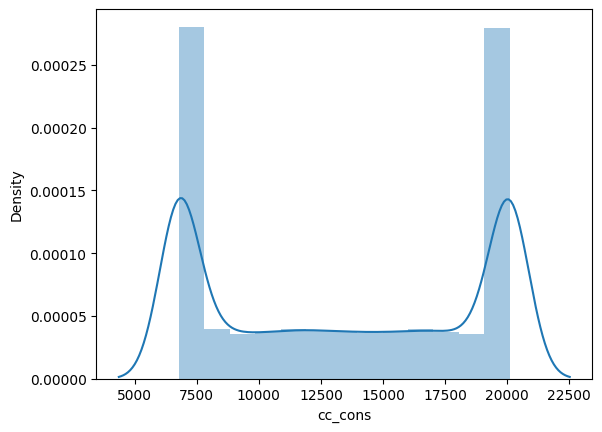

In [23]:
sns.distplot(data.cc_cons)
plt.show()


In [24]:
from scipy.stats import shapiro

stat, p = shapiro(data['cc_cons'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')


Statistics=nan, p=1.000
Data looks Gaussian (fail to reject H0)


/home/daro/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.



### Modeling

#### Convert Category to Numeric

In [25]:
# Convert Categorical Data to Numerical Data
from sklearn.preprocessing import LabelEncoder

# find all categorical columns using np
category_cols = data.select_dtypes(exclude=np.number).columns

# instantiate LabelEncoder
le = LabelEncoder()

# apply le on categorical feature columns
data[category_cols] = data[category_cols].apply(lambda col: le.fit_transform(col))

#### Split Data to Train & Test

In [26]:
credit_spend_existing = data[~data.cc_cons.isnull()]
credit_spend_new = data[data.cc_cons.isnull()]

In [27]:
credit_spend_new['cc_cons'].fillna(0, inplace=True)

/tmp/ipykernel_16235/334500265.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Model Training with Linear Regression

In [28]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = credit_spend_existing.drop(['ID', 'cc_cons'], axis=1)
y = credit_spend_existing['cc_cons']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using RFE
model = LinearRegression()  # Using Linear Regressor

selector = RFE(model, n_features_to_select=10)

selector.fit(X_train, y_train)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)


# Linear Regression
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# Evaluation using RMSPE
def rmspe(y_true, y_pred):
    return (mean_squared_error(y_true, y_pred) / mean_squared_error(y_true, np.zeros_like(y_true))) ** 0.5

rmspe_score = rmspe(y_test, y_pred)
print(f"RMSPE: {rmspe_score * 100}")

In [ ]:
# Features for prediction (credit_spend_new)
X_new_selected = selector.transform(credit_spend_new.drop(['ID', 'cc_cons'], axis=1))

# Predict credit card consumption for credit_spend_new
predicted_cc_cons = model.predict(X_new_selected)

# Fill the missing values in credit_spend_new with the predicted values
credit_spend_new['cc_cons'] = predicted_cc_cons

credit_spend_new

/tmp/ipykernel_12348/2589971490.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ID  age  Emp_Tenure_Years  Tenure_with_Bank  region_code  \
0      15007.5   53              16.4                 8        628.0   
1      15007.5   36              14.4                 8        656.0   
2      11749.0   33               4.9                 8        424.0   
3      11635.0   33               9.6                 3        614.0   
4       8908.0   33              12.0                 7        750.0   
...        ...  ...               ...               ...          ...   
19994   4997.5   34              12.6                 8        686.0   
19995   4997.5   53              16.4                 6        424.0   
19996  15007.5   53              16.4                 5        799.0   
19997   7081.0   53              16.4                 3        466.0   
19998   6821.0   33               6.0                 8        619.0   

       NetBanking_Flag  Avg_days_between_transaction  cc_cons_apr  \
0                    1                           6.0     7998.480   
1                    0                          12.0    16479.640   
2                    1                          13.0    21165.000   
3                    1                          16.0     9662.310   
4                    1                          16.0    13239.860   
...                ...                           ...          ...   
19994                0                           6.0     7680.150   
19995                1                           7.0     4611.000   
19996                0                          14.0     9545.000   
19997                0                          10.0     4391.655   
19998                0                          16.0    11456.230   

       dc_cons_apr  cc_cons_may  ...  credit_amount_jun  credit_count_jun  \
0         2289.000     9553.000  ...           86391.07                21   
1         1629.355     7386.490  ...           86391.07                 7   
2         9310.855     4170.530  ...           35467.00                16   
3         5306.390     5261.000  ...           86391.07                 4   
4         7063.000    18635.645  ...           83992.00                21   
...            ...          ...  ...                ...               ...   
19994     9310.855    18635.645  ...           42180.00                21   
19995     9310.855    18635.645  ...           31284.00                 4   
19996     2061.000     4269.270  ...           86391.07                21   
19997     9310.855    11019.000  ...           46800.00                 4   
19998     3999.000     3636.460  ...           24987.00                21   

       debit_count_jun  max_credit_amount_jun  emi_active       cc_cons  \
0                   73                46088.0     2646.72  13379.222021   
1                   12                18999.5     5469.79  13409.423493   
2                   42                41121.0     7207.85  13252.288954   
3                   12                32003.0     1544.69  13341.020286   
4                   12                18999.5     2621.39  13568.659536   
...                ...                    ...         ...           ...   
19994               58                18999.5     4253.74  13391.223823   
19995               38                42872.0     6334.20  13477.308130   
19996               12                36747.0     9362.14  13280.834377   
19997               38                18999.5     1930.19  13352.778883   
19998               73                18999.5     9362.14  13490.332411   

       account_type  gender  Income  loan_enq  
0                 0       1       2         0  
1                 0       1       2         0  
2                 0       0       2         0  
3                 0       1       2         0  
4                 0       1       0         0  
...             ...     ...     ...       ...  
19994             0       1       2         0  
19995             0       0       2         0  
19996             0       1       2         0  
19997       

In [ ]:
# Combine the data back together
combined_data = pd.concat([credit_spend_existing, credit_spend_new])

In [ ]:
# Separate features and target variable for the combined data
X_combined = combined_data.drop(['ID', 'cc_cons'], axis=1)
y_combined = combined_data['cc_cons']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Feature selection using RFE
model = LinearRegression()  # Using Linear Regressor
selector = RFE(model, n_features_to_select=10)
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Linear Regression
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# Evaluation using RMSPE
def rmspe(y_true, y_pred):
    return (mean_squared_error(y_true, y_pred) / mean_squared_error(y_true, np.zeros_like(y_true))) ** 0.5

rmspe_score = rmspe(y_test, y_pred)
print(f"RMSPE: {rmspe_score * 100}")

RMSPE: 33.31800356127774
